# Checking gaussianity of velocities.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize as sco
from tqdm import trange

In [3]:
gaia_mc = pd.read_csv("gaia_mc.csv")
df = gaia_mc.iloc[gaia_mc.flag.values == 1]

# Cut out stars with large vb uncertainties.
m = df.vb_err.values < 1.
m &= df.phot_g_mean_mag.values < 16.
df = df.iloc[m]

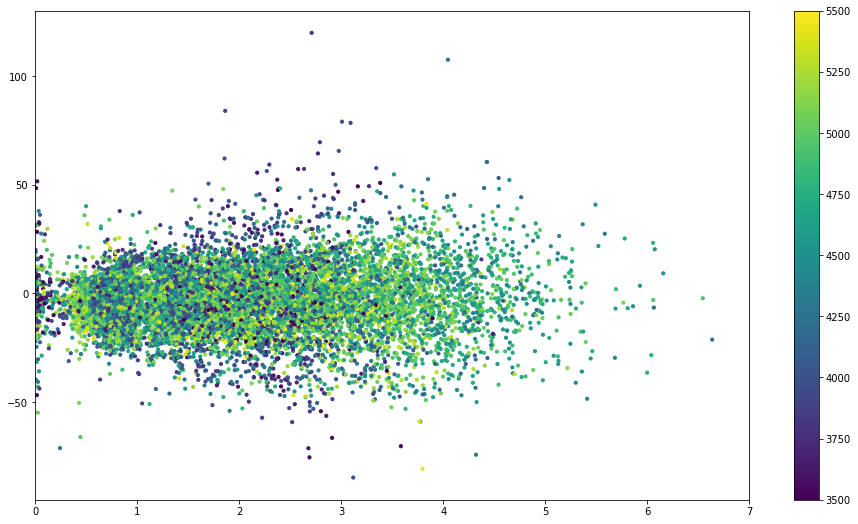

In [4]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
cb = ax.scatter(df.age, df.vb, c=df.color_teffs, s=10, vmin=3500, vmax=5500)
ax.set_xlim(0, 7)
plt.colorbar(cb)

In [14]:
def Gaussian(mu, std, A, x):
    return A/(std*np.sqrt(2*np.pi)) * np.exp(-.5*(mu - x)**2/std**2)

def lnlike(par, x, y):
    mu1, std1, A1, mu2, std2, A2 = par
    model = Gaussian(mu1, std1, A1, x) + Gaussian(mu2, std2, A2, x) 
    return sum(-.5 * (model - y)**2)

def nll(par, x, y):
    return -lnlike(par, x, y)

In [6]:
def fit_2gaussians(vb, nbins=50):
    inits = np.array([-3, 13, 1, -3, 20, .3])

    y, x = np.histogram(vb, nbins, density=True);
    args = (x[:-1], y)
    
    results = sco.minimize(nll, inits, args=args)
    return results.x

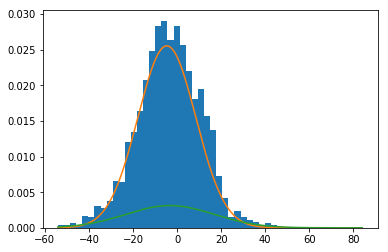

In [7]:
m = (df.age.values < 2) * (df.age.values > 1) * (df.Teff.values < 5000)
pars = fit_2gaussians(df.vb.values[m])

xs = np.linspace(min(df.vb.values[m]), max(df.vb.values[m]), 1000)
y, x = np.histogram(df.vb.values[m], 50, density=True)
plt.hist(df.vb.values[m], 50, density=True)

plt.plot(xs, Gaussian(pars[0], pars[1], pars[2], xs))
plt.plot(xs, Gaussian(pars[3], pars[4], pars[5], xs))

  0%|          | 0/9 [00:00<?, ?it/s]

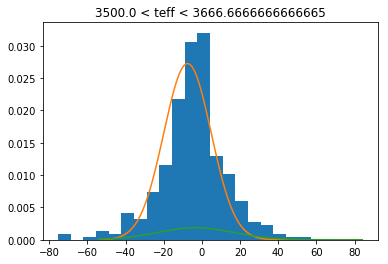

 11%|█         | 1/9 [00:00<00:01,  7.47it/s]

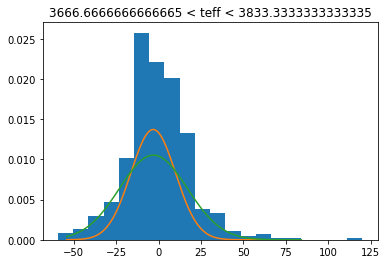

 22%|██▏       | 2/9 [00:00<00:00,  7.70it/s]

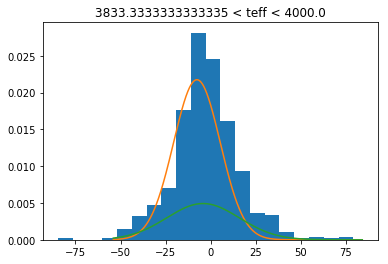

 33%|███▎      | 3/9 [00:00<00:00,  7.91it/s]

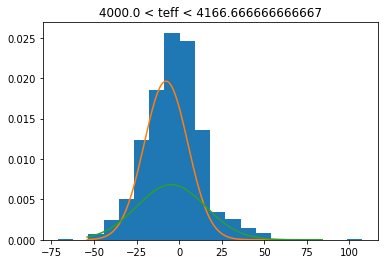

 44%|████▍     | 4/9 [00:00<00:00,  8.08it/s]

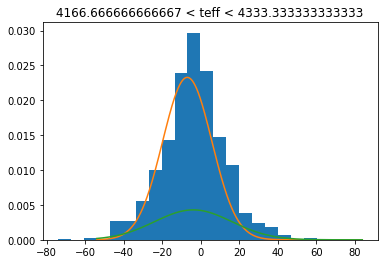

 56%|█████▌    | 5/9 [00:00<00:00,  7.92it/s]

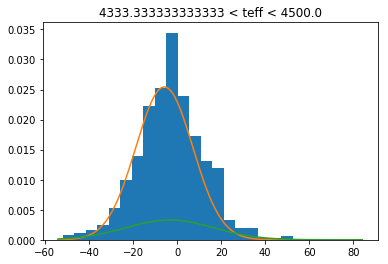

 67%|██████▋   | 6/9 [00:00<00:00,  7.81it/s]

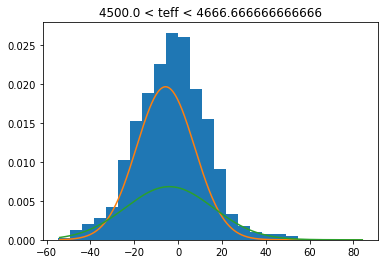

 78%|███████▊  | 7/9 [00:00<00:00,  7.77it/s]

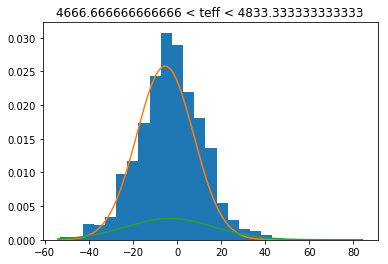

 89%|████████▉ | 8/9 [00:01<00:00,  7.59it/s]

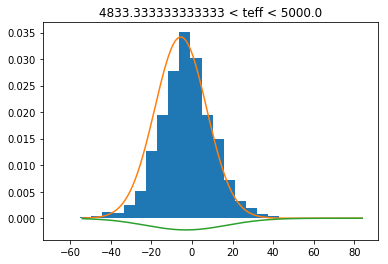

100%|██████████| 9/9 [00:01<00:00,  7.64it/s]


In [12]:
nteff_bins = 10
minteff = 3500
maxteff = 5000
teff_bins = np.linspace(minteff, maxteff, nteff_bins)
age_range = (0, 5)  # Gyr

amplitudes1, sigmas1, mus1 = [np.zeros(nteff_bins - 1) for i in range(3)]
amplitudes2, sigmas2, mus2 = [np.zeros(nteff_bins - 1) for i in range(3)]
for i in trange(nteff_bins - 1):
    m = (teff_bins[i] < df.Teff.values) * (df.Teff.values < teff_bins[i+1])
    m &= (age_range[0] < df.age.values) * (df.age.values < age_range[1])
    pars = fit_2gaussians(df.vb.values[m], nbins=20)
    amplitudes1[i] = pars[2]
    sigmas1[i] = pars[1]
    mus1[i] = pars[0]
    amplitudes2[i] = pars[5]
    sigmas2[i] = pars[4]
    mus2[i] = pars[3]
    
    plt.hist(df.vb.values[m], 20, density=True)
    plt.title("{0} < teff < {1}".format(teff_bins[i], teff_bins[i+1]))
    plt.plot(xs, Gaussian(pars[0], pars[1], pars[2], xs))
    plt.plot(xs, Gaussian(pars[3], pars[4], pars[5], xs))
    plt.show()

Text(0, 0.5, 'Amplitude of 2nd Gaussian')

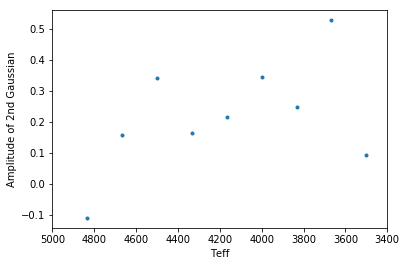

In [9]:
plt.plot(teff_bins[:-1], amplitudes, ".")
plt.xlim(5000, 3400)
plt.xlabel("Teff")
plt.ylabel("Amplitude of 2nd Gaussian")

Text(0, 0.5, 'Sigma of 2nd Gaussian')

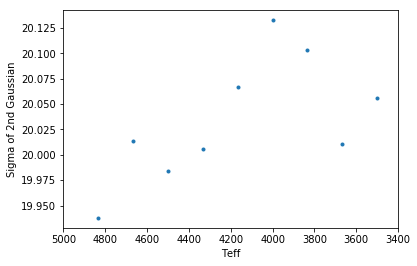

In [10]:
plt.plot(teff_bins[:-1], sigmas, ".")
plt.xlim(5000, 3400)
plt.xlabel("Teff")
plt.ylabel("Sigma of 2nd Gaussian")

Text(0, 0.5, 'Mu of 2nd Gaussian')

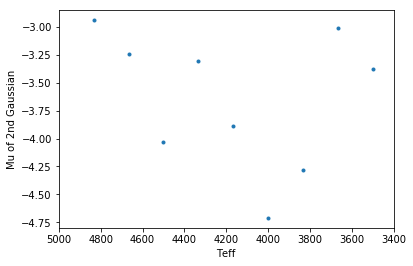

In [11]:
plt.plot(teff_bins[:-1], mus, ".")
plt.xlim(5000, 3400)
plt.xlabel("Teff")
plt.ylabel("Mu of 2nd Gaussian")

Text(0, 0.5, 'sigma of 1st Gaussian')

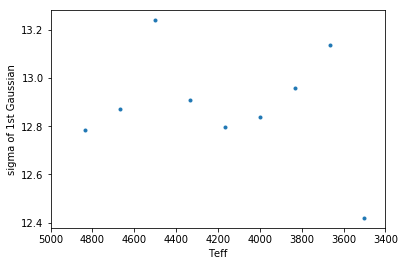

In [15]:
plt.plot(teff_bins[:-1], sigmas1, ".")
plt.xlim(5000, 3400)
plt.xlabel("Teff")
plt.ylabel("sigma of 1st Gaussian")

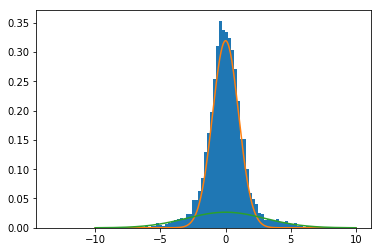

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize as sco
from tqdm import trange

N = 10000
mus = [0, 0]
f = .2 # fraction of outliers
lnvs = [np.log(1), np.log(9)]
                         
x0 = np.random.randn(int(N*(1-f)))*np.exp(lnvs[0])**.5 + mus[0]
x1 = np.random.randn(int(N*f))*np.exp(lnvs[1])**.5 + mus[1]
x = np.concatenate((x0, x1))
x += np.random.randn(N)*.01
xerr = np.ones_like(x)*.01

plt.hist(x, 100, density=True);

xs = np.linspace(-10, 10, 1000)
g0 = Gaussian(mus[0], np.exp(lnvs[0])**.5, .8, xs)
g1 = Gaussian(mus[1], np.exp(lnvs[1])**.5, .2, xs)
plt.plot(xs, g0)
plt.plot(xs, g1)

10401.17091688833
8417.245675374796


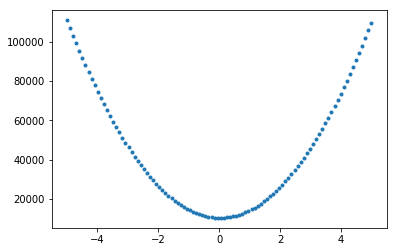

In [90]:
def nll(pars, x, xerr):
    
    mu0, lnv0, mu1, lnv1, f = pars
    v0, v1 = np.exp(lnv0), np.exp(lnv1)
    
    # Prior on f:
    if f < 0 or f > 1:
        return -np.inf
    
    lnlike0 = sum(-.5 * (1-f) * (x - mu0)**2 / (v0 + xerr**2))
    lnlike1 = sum(-.5 * f * (x - mu1)**2 / (v1 + xerr**2))
    return - (lnlike0 + lnlike1)

inits = np.array([mus[0], lnvs[0], mus[1], lnvs[1], f])
print(nll(inits, x, xerr))
print(nll(inits+.1, x, xerr))

l = []
mu_range = np.linspace(-5, 5, 100)

for m in mu_range:
    inits = np.array([m, lnvs[0], mus[1], lnvs[1], f])  # mus[1], lnvs[1], lnamps[1]])
    l.append(nll(inits, x, xerr))
plt.plot(mu_range, l, ".")

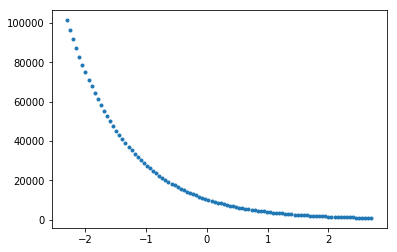

In [89]:
l = []

vrange = np.linspace(np.log(.1), np.log(15), 100)
for v in vrange:
    inits = np.array([mus[0], v, mus[1], lnvs[1], f])  # mus[1], lnvs[1], lnamps[1]])
    l.append(nll(inits, x, xerr))
plt.plot(vrange, l, ".")

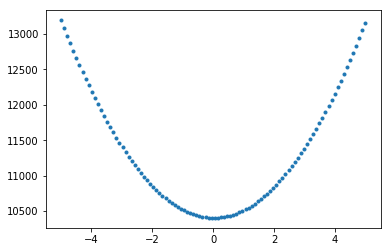

In [91]:
l = []
mu_range = np.linspace(-5, 5, 100)

for m in mu_range:
    inits = np.array([mus[0], lnvs[0], m, lnvs[1], f])  # mus[1], lnvs[1], lnamps[1]])
    l.append(nll(inits, x, xerr))
plt.plot(mu_range, l, ".")

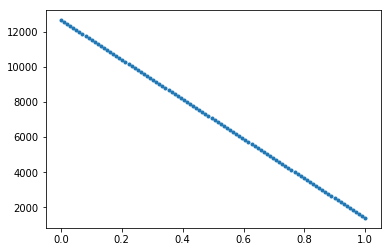

In [92]:
l = []
f_range = np.linspace(0, 1, 100)

for _f in f_range:
    inits = np.array([mus[0], lnvs[0], mus[1], lnvs[1], _f])  # mus[1], lnvs[1], lnamps[1]])
    l.append(nll(inits, x, xerr))
plt.plot(f_range, l, ".")

In [95]:
results = sco.minimize(nll, inits, args=[x, xerr])

TypeError: nll() missing 1 required positional argument: 'xerr'

In [ ]:
x = np.random.randn(10000)

def nll(pars, x):
    mu, sig = pars
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


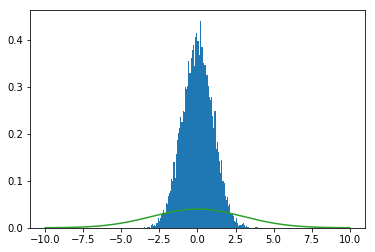

In [40]:
plt.hist(x, 100, density=True);

g0 = Gaussian(results.x[0], np.exp(results.x[1])**.5, results.x[2], xs)
# g1 = Gaussian(results.x[3], np.exp(results.x[4])**.5, results.x[5], xs)
plt.plot(xs, g0)
plt.plot(xs, g1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function sample_gaussian

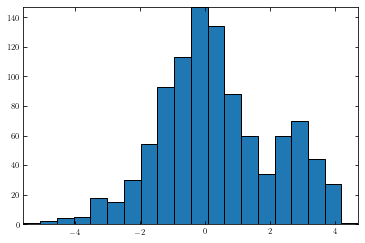

In [3]:
#  Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from gmm import GMM

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up the dataset.
#  We'll use scikit-learn's Gaussian Mixture Model to sample
#  data from a mixture of Gaussians.  The usual way of using
#  this involves fitting the mixture to data: we'll see that
#  below.  Here we'll set the internal means, covariances,
#  and weights by-hand.
np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0], [3]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.3, 0.5, 0.2])

X = gmm.sample(1000)
# means = np.array([[-1], [0], [3]])
# covars = np.array([[1.5], [1], [0.5]]) ** 2
# weights = np.array([0.3, 0.5, 0.2])

# nsamps = 1000
# X0 = np.random.randn(int(nsamps/weights[0]))*covars[0] + means[0]
# X1 = np.random.randn(int(nsamps/weights[1]))*covars[1] + means[1]
# X2 = np.random.randn(int(nsamps/weights[2]))*covars[2] + means[2]
# X = np.concatenate((X0, X1, X2))

plt.hist(X, 20);

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp i

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: Deprec

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp is deprecated; sklearn.utils.extmath.logsumexp was deprecated in version 0.19 and will be removed in 0.21. Use scipy.misc.logsumexp instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function logsumexp

AttributeError: 'GMM' object has no attribute 'eval'

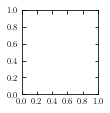

In [4]:
#------------------------------------------------------------
# Learn the best-fit GMM models
#  Here we'll use GMM in the standard way: the fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GMM(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(5, 1.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob, responsibilities = M_best.eval(x)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = M_best.predict_proba(x)
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()